In [11]:
#_*_coding:utf-8 _*_
import io
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager
import pytagcloud
import webbrowser

def get_nouns(x, stopwordlist):
    np = Okt()
    nns = np.nouns(x)
    nns = [x for x in nns if len(x)>1]
    nns = [ x for x in nns if x not in stopwordlist]
    return nns

stpword_path = './temp/stopwords.txt'
with open(stpword_path, encoding='utf-8') as f:
    stopwordlist = f.readlines()
stopwordlist = [x.strip() for x in stopwordlist]

f = io.open('./temp/tweet_football_20201111.txt','r',encoding='utf-8')
data=''
while True:
    line=f.readline()
    if not line: break
    data = data + line
f.close()


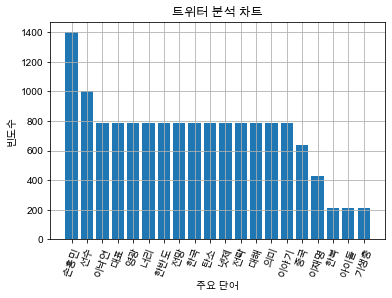

True

In [13]:

ns = get_nouns(data,stopwordlist)
count = Counter(ns)
wordInfo = dict()
for tags,counts in count.most_common(20):
    wordInfo[tags] = counts
    
font_location='/Library/Fonts/Arial unicode.ttf'
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

plt.xlabel(u'주요 단어')
plt.ylabel(u'빈도수')
plt.title(u'트위터 분석 차트')
plt.grid(True)
sorted_Dict_Values = sorted(wordInfo.values(),reverse=True)
sorted_Dict_Keys = sorted(wordInfo,key=wordInfo.get,reverse=True)
plt.bar(range(len(wordInfo)), sorted_Dict_Values, align='center')
plt.xticks(range(len(wordInfo)),list(sorted_Dict_Keys),rotation='70')
plt.show()

taglist = pytagcloud.make_tags(dict(wordInfo).items(), maxsize=80)
pytagcloud.create_tag_image(taglist, './temp/tweet.jpg', size=(640,480),  
    fontname='Nanum Gothic Coding', rectangular=False)
webbrowser.open('./temp/tweet.jpg')

